# Booking.com Data Job Analysis
***
<p align="center">
<img src="Images/booking_logo.jpg" style>
</p>

### Introduction
_Passing by the Booking.com offices aboard a ferry on my daily commute I wondered, **what would it take to work for one of the world's biggest travel companies?**_

*I got inspired by their story - growing from a small Dutch startup in 1996 to leading digital travel company, and decided to talk to some of their employees. Throughout these talks it became apparent that their strong focus on creating an environment for learning and experimenting stood at the foundation of creating innovative solutions and value for its customers. These values resonated with me, and helped fuel this experiment.*

*Coming from a background in Architecture I've always had a strong interest in translating questions into insights, taking the conceptual and turning it into reality. But what transferable skills do I have?
Seeking out job requirements on the Booking.com career platform it soon became apperent that my passion for data, optimalization, python would be of use. Great, let's apply! Resume and covering letter at the ready, I stumble accross their hiring process:*

<p align="center">
<img src="Images/booking_ai.jpg" style>
</p>

*No cover letter, no person reading resumes, no applying to specific positions. Instead:*

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

_This sentence sparked my interest and started this project. **What if I could use a data-driven approach to tailor my resume to the positions I'm interested in?**_
***

### Project Objective

To create a clear outline and direction we start with our defining our goal for this project.

**Research Question: What skills and experiences are most relevant for Data-related positions at Booking.com?**

Key questions:
- How many data-related positions are available?
- What positions are available how are they segmented?
- What impact does location have on availibilty and type of job?
- What skills, education, experiences are most coveted by Booking.com?



### Methodology
- Reading in raw data from web scraper
- Cleaning up data / string manipulation
- Exploratory Analysis to understand data
- Delving into specifics to answer key questions


### Data
- All data was obtained through webscraping the [Booking.com career website](https://jobs.booking.com/careers) on 19-02-2022
- Webscraper can be found at [Web Scraper/Web_Scraper_Booking_Career.ipynb](https://github.com/niekvanderzwaag/Booking.com/blob/main/Web%20Scraper/Web_Scraper_Booking_Career.ipynb)
***

# Imports

In [1]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.options.display.max_colwidth = 500
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#String manipulations
import re, string
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

#NLTK Packages: Un-comment lines below to download relevant NLTK packages
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

#Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import seaborn as sns
import itertools

#Plot output
%matplotlib inline
plt.rcParams['figure.figsize'] = [18,10]
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'

#Booking.com colorscheme RGBA
blue_d = np.array([0/256, 53/256, 128/256, 1])
blue_l = np.array([0/256, 159/256, 227/256, 1])
yellow = np.array([254/256, 186/256, 2/256, 1])
grey = np.array([102/256, 102/256, 102/256, 1])
white = np.array([242/256, 246/256, 250/256, 1])

#Booking.com colormaps (RGBA)
cmap1 = ListedColormap([blue_d])
cmap2 = ListedColormap([blue_d,blue_l])
cmap3 = ListedColormap([blue_d,blue_l,yellow])
cmap4 = ListedColormap([blue_d,blue_l,yellow,grey])
cmap5 = ListedColormap([blue_d,blue_l,yellow,grey,white])

#Booking.com palletes (Hex)
c1 = ['#003580']
c2 = ['#003580', '#009fe3']
c3 = ['#003580', '#009fe3', '#feba02']
c4 = ['#003580', '#009fe3', '#feba02', '#666']
c5 = ['#003580', '#009fe3', '#feba02', '#666', '#f2f6fa']
c15 = ['#003580', '#009fe3', '#feba02', '#D9958D', '#00C4CC', '#77A0D9', '#8CB811', '#F57D00', '#4A8594', '#D52685', '#CE1126', '#553A99', '#D9958D','#0EA013', '#8283FA']

#Booking.com settings Seaborn
sns.set(rc={'axes.facecolor':'#f2f6fa', 'figure.facecolor':'#f2f6fa'})
sns.set_palette(sns.color_palette(c3))

#Wordcloud
from wordcloud import WordCloud

#Quality of life
from IPython.display import display
pd.set_option('colheader_justify', 'left')
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f
%precision 2

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv('Booking_Jobs_All_220218.csv')

In [3]:
df.head(3)

Job Title                   \
0  Junior Endpoints Engineer   
1            UX Writer - B2B   
2   Treasury Risk Specialist   

  Job Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \
0  Booking.com\nIt wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone.\nIn fact, that’s what we do at Booking.com. We make it easier for everyone to experience the world. And while that world might feel a little farther away right now, we’re busy preparing for when the world is ready to travel once more.\nAcross our offices worldwide...   
1  At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world.\nWe’re looking for a UX Copywriter to join our writi...   
2  Booking.com’s global treasury team is looking for a  Treasury risk management professional to join our growing team. \nThe Treasury Risk Specialist is responsible for performing financial analysis and operating processes relating to the identification, quantification, management and reporting of credit, counterparty, liquidity and other Treasury risk typologies that attach to Booking’s evolving business models, strategic initiatives and third party relationships.  \nThe individual will form ...   

  Location                    Team                       
0  Manchester, United Kingdom               Engineering  
1      Amsterdam, Netherlands  Design & User Experience  
2      Amsterdam, Netherlands                   Finance

All data was directly scraped from the Booking.com career platform and contains the following: 

Columns:
- **Job Title**: title of position (str)
- **Job Descriptions**: complete description of position (str)
- **Location**: city and country information (str)
- **Team**: team category determined by Booking.com (str)

In [4]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        653 non-null    object
 1   Job Description  653 non-null    object
 2   Location         653 non-null    object
 3   Team             653 non-null    object
dtypes: object(4)
memory usage: 20.5+ KB


# Introduction

We'll start by getting to know the dataset a bit better through visualizations.

1. Number of Jobs
2. Teams
3. Location
4. Job Description

### Number of Jobs

In [5]:
print('Dataframe shape is {}, containing a total of {} jobs'.format(df.shape,df.shape[0]))


Dataframe shape is (653, 4), containing a total of 653 jobs


### Teams

In [6]:
df_teams = df.groupby(by=['Team']).count().reset_index()
df_teams.sort_values(by='Job Title', ascending=False, inplace=True)

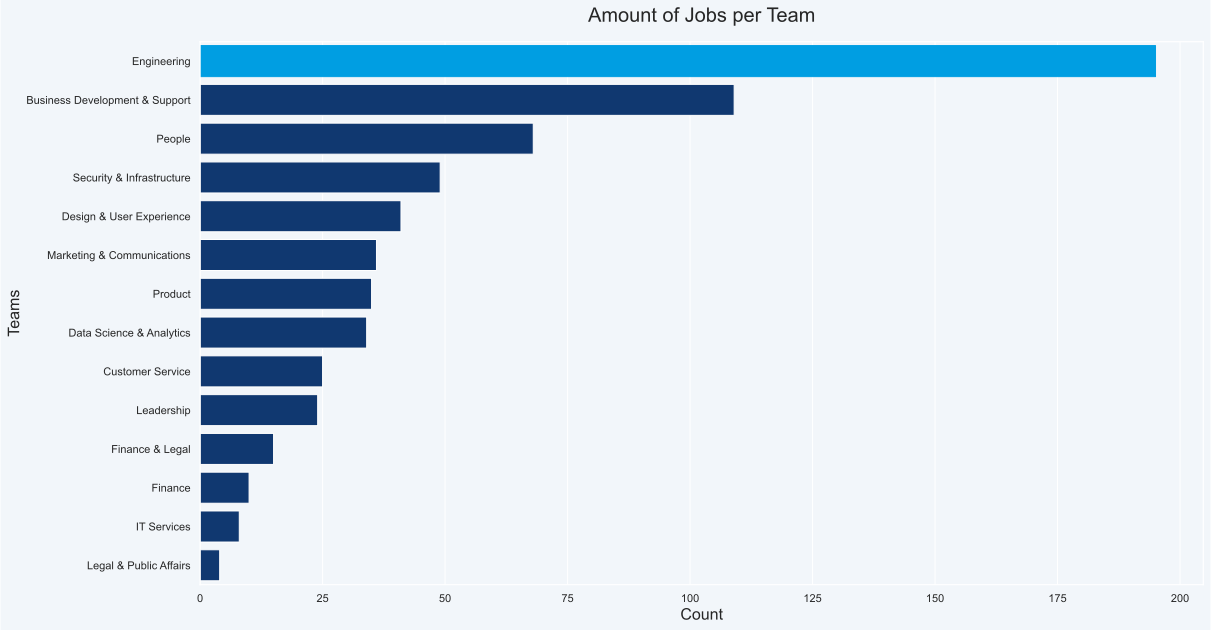

In [7]:
#Plot
ax = sns.barplot(data=df_teams, x='Job Title', y='Team', palette=c1)

#Highlight
for bar in ax.patches:
    if bar.get_y() < 0:
        bar.set_color(blue_l)  

#Labels
plt.xlabel('Count', fontsize=16)
plt.ylabel('Teams', fontsize=16)
plt.title('Amount of Jobs per Team', fontsize=20, pad=20);

In [8]:
print('Out of a total of {} jobs, {:.2f}% ({}) are in Engineering'.format(df['Team'].value_counts().sum(),((df['Team'].value_counts()[0]/df['Team'].value_counts().sum()) * 100),df['Team'].value_counts()[0]))

Out of a total of 653 jobs, 29.86% (195) are in Engineering


##### Inference:
> - Although Booking.com is a global company, over 60% of its jobs are based in The Netherlands 

### Location

In [9]:
df['Country'] = df['Location'].apply(lambda x : x.split(', ')[1]) #Picking only Country from Location
df['Country'] = df['Country'].apply(lambda x : x.split(' and ')[0]) #Picking first location if multiple are mentioned

#Only for the US are states mentioned - comparing string length to 2-letter abbriviation and sort into United States
for i in range(df.shape[0]):
    if len(df['Country'][i]) == 2:
        df['Country'][i] = 'United States'

df_location = df.groupby(by=['Country']).count().reset_index()
df_location.sort_values(by='Job Title', ascending=False, inplace=True)

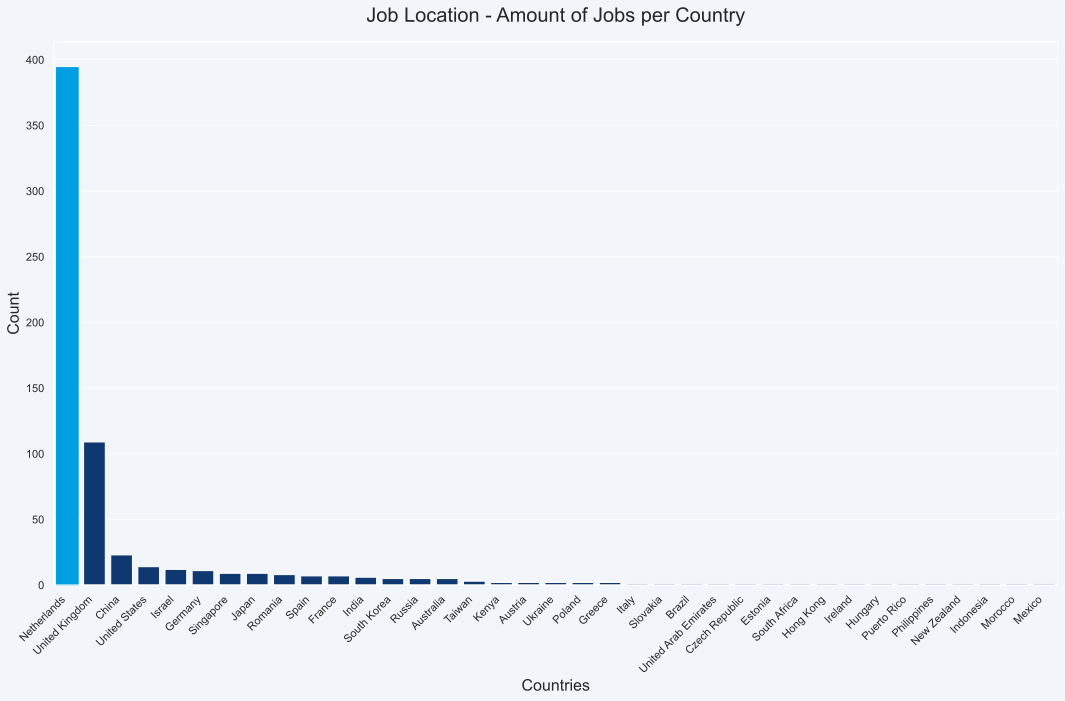

In [10]:
#Plot
ax = sns.barplot(data=df_location, x='Country', y='Job Title', palette=c1)

#Highlight
for bar in ax.patches:
    if bar.get_x() < 0:
        bar.set_color(blue_l)  

#Labels
plt.xticks(rotation = 45, ha= 'right')
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Job Location - Amount of Jobs per Country', fontsize=20, pad=20);

In [11]:
print('Out of a total of {} jobs, {:.2f}% ({}) are located in The Netherlands'.format(df['Country'].value_counts().sum(),((df['Country'].value_counts()[0]/df['Country'].value_counts().sum()) * 100),df['Country'].value_counts()[0]))

Out of a total of 653 jobs, 60.34% (394) are located in The Netherlands


##### Inference:
> - Although Booking.com is a global company, over 60% of its jobs are based in The Netherlands 

## 3. Job Descriptions

In order to dive deeper into the data we need to understand Job Descriptions. This text is at the heart of answering what skills, requirements and responsibilities are demanded to fill a certain positions - and therefor key in answering our own research questions. Unfortunately, all this information is hidden in long texts that make it hard for us (and computers) to make sense of it. In order to measure our progress in making sense of things, we start by creating some measurable features and a baseline against which we can compare our results.

***

## Baseline & Features

Let's create some general statistical text features form the Job Description.

1. **Word Count** - Total number of words
2. **Character Count** - Total number of characters excluding spaces   
3. **Word Density** - Average length of the words used  
4. **Punctuation Count** - Total number of punctuations used

In [12]:
df['Job Description'] = df['Job Description'].apply(lambda x : re.sub('\\\n',' ', x)) #Replace all newlines
df['R_word_count'] = df['Job Description'].apply(lambda x : len(x.split())) #Splitting strin into words
df['R_char_count'] = df['Job Description'].apply(lambda x : len(x.replace(' ',''))) #Removing spaces and counting characters
df['R_word_density'] = df['R_word_count'] / (df['R_char_count'] + 1) #Devide total words by number of characters
df['R_punc_count'] = df['Job Description'].apply(lambda x : len([a for a in x if a in string.punctuation])) #Count punctuation by comparing to string.punctuation

df_stats_raw = df[['Job Title','R_word_count', 'R_char_count', 'R_word_density', 'R_punc_count']]
df_stats_raw.head()

Job Title                                    R_word_count  R_char_count  \
0                   Junior Endpoints Engineer   962          5727           
1                             UX Writer - B2B   687          3757           
2                    Treasury Risk Specialist   833          5203           
3  Product Manager - Insurance - Policy Admin  1155          6526           
4              Account Executive - Manchester   549          2923           

   R_word_density  R_punc_count  
0 0.17             161           
1 0.18              77           
2 0.16             106           
3 0.18             116           
4 0.19              53

### Word Count

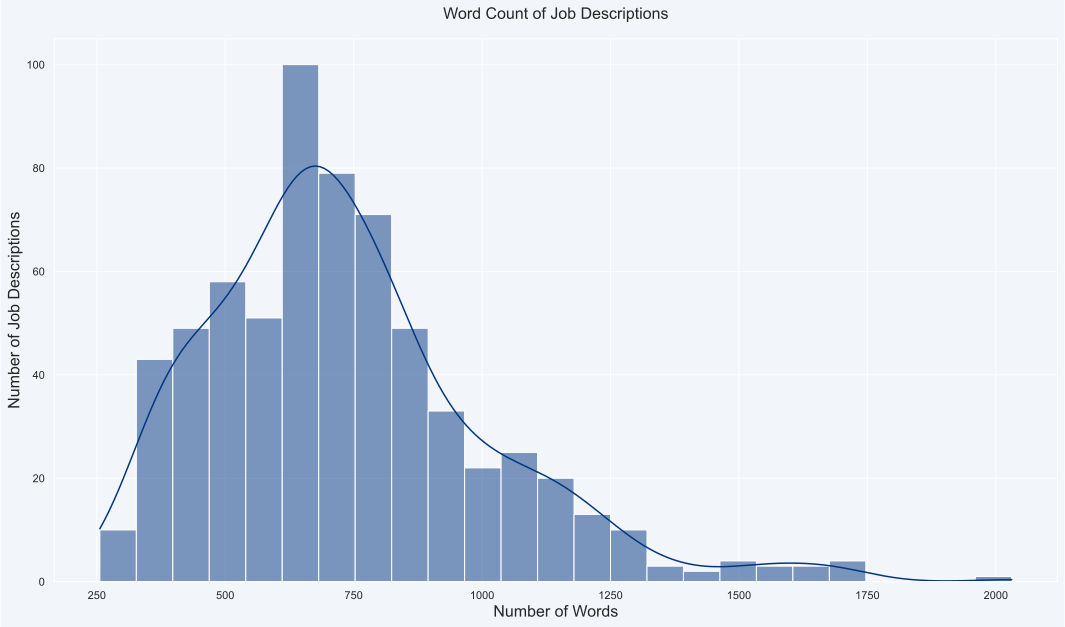

In [13]:
sns.histplot(data=df_stats_raw, x='R_word_count', bins=25, palette=c1, kde=True)

plt.xlabel('Number of Words', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Word Count of Job Descriptions', fontsize=16, pad=20);

In [14]:
print('The average word count for a Job Description is {:1.0f} words'.format(df_stats_raw['R_word_count'].mean()))
print('The longest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_word_count'].idxmax()][0],df_stats_raw['R_word_count'].max()))
print('The shortest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_word_count'].idxmin()][0],df_stats_raw['R_word_count'].min()))

The average word count for a Job Description is 735 words
The longest Job Description is for Director Legal Trips - Product & Commercial, with a word count of 2031 words
The shortest Job Description is for Office Manager (6 Month Contract), with a word count of 256 words


In [15]:
df_stats_raw[df_stats_raw['R_word_count'] > 1000]

Job Title                                    R_word_count  R_char_count  \
3    Product Manager - Insurance - Policy Admin  1155          6526           
30               Commercial Director, Insurance  1280          7779           
51                       Team Leader IT support  1277          7630           
52           Head of Human Resources/ HR Leader  1122          6630           
56        Technical Product Manager - Insurance  1122          6320           
..                                          ...           ...           ...   
578    Group Product Manager, FinTech - RegTech  1064          5897           
624            Engineering Manager - China Tech  1104          6157           
630              Senior Data Engineer - FinTech  1084          6210           
647                              Java Developer  1121          6007           
651                       Senior Java Developer  1050          5643           

     R_word_density  R_punc_count  
3   0.18             116           
30  0.16             246           
51  0.17             177           
52  0.17             198           
56  0.18             116           
..              ...           ...  
578 0.18             158           
624 0.18             128           
630 0.17             173           
647 0.19             113           
651 0.19             101           

[100 rows x 5 columns]

In [16]:
print('Job Descriptions over 1000 words long: {:.2f}%'.format((df_stats_raw[df_stats_raw['R_word_count'] > 1000].count()[0] / df_stats_raw.shape[0]) * 100))

Job Descriptions over 1000 words long: 15.31%


##### Inference:
> - 50% of all Job Descriptions fall between roughly 550-850 words
> - 15% of Job Descriptions count over 1000 words, mostly for Senior/Director level jobs

### Character Count

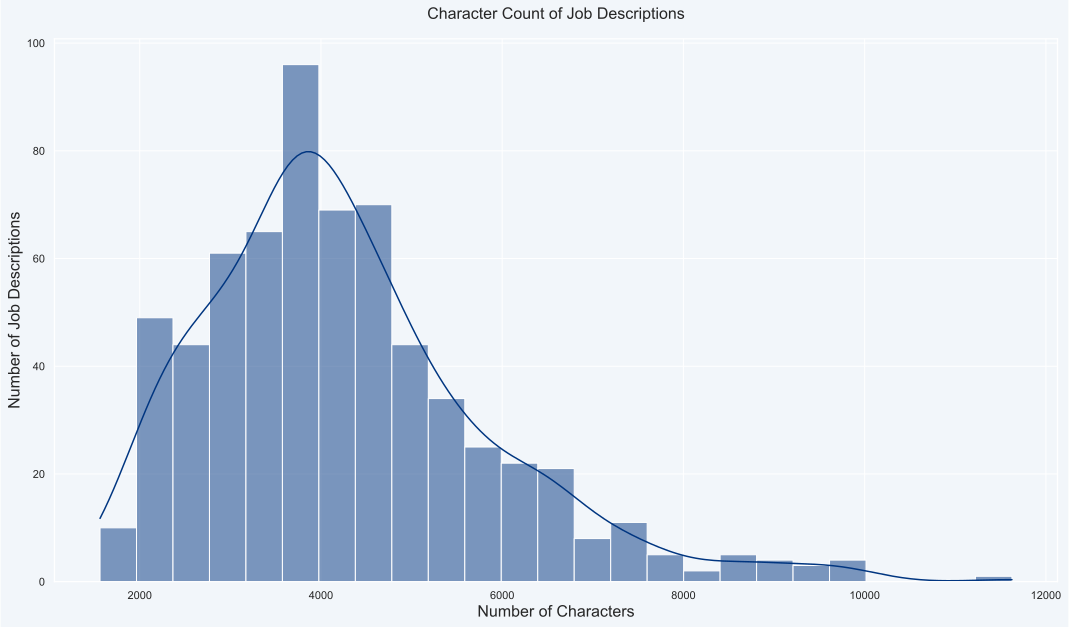

In [17]:
sns.histplot(data=df_stats_raw, x='R_char_count', bins=25, palette=c1, kde=True)

plt.xlabel('Number of Characters', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Character Count of Job Descriptions', fontsize=16, pad=20);

In [18]:
print('The average word count for a Job Description is {:1.0f} words'.format(df_stats_raw['R_char_count'].mean()))
print('The longest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_char_count'].idxmax()][0],df_stats_raw['R_char_count'].max()))
print('The shortest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_char_count'].idxmin()][0],df_stats_raw['R_char_count'].min()))

The average word count for a Job Description is 4265 words
The longest Job Description is for Director Legal Trips - Product & Commercial, with a word count of 11625 words
The shortest Job Description is for Outbound Executive - Taipei, with a word count of 1562 words


## Inference:
> - Similar in distribution to the word count graph
> - 50% of all Job Descriptions fall between roughly 3.200-5.000 characters

### Word Density

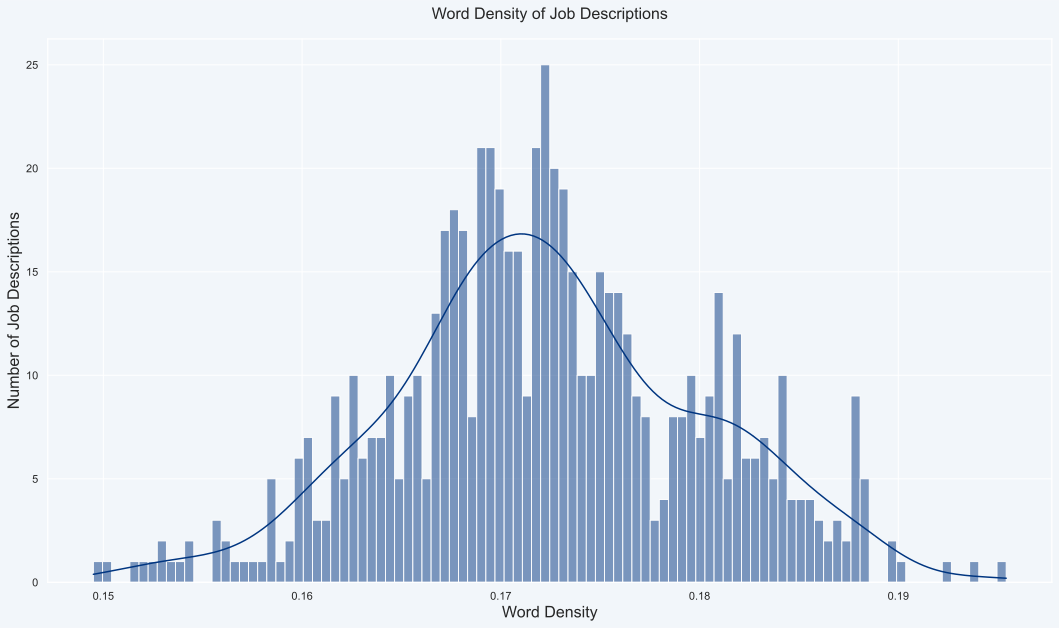

In [19]:
sns.histplot(data=df_stats_raw, x='R_word_density', bins=25, palette=c1, kde=True)

plt.xlabel('Word Density', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Word Density of Job Descriptions', fontsize=16, pad=20);

In [20]:
print('The average word density for a Job Description is {:.3f}'.format(df_stats_raw['R_word_density'].mean()))
print('The Job Description {} has the highest word density: {:.3f}'.format(df_stats_raw.iloc[df_stats_raw['R_word_density'].idxmax()][0],df_stats_raw['R_word_density'].max()))
print('The Job Description {} has the lowest word density: {:.3f}'.format(df_stats_raw.iloc[df_stats_raw['R_word_density'].idxmin()][0],df_stats_raw['R_word_density'].min()))

The average word density for a Job Description is 0.172
The Job Description Senior Front End Developer has the highest word density: 0.195
The Job Description Account Manager - Düsseldorf (m/f/d) has the lowest word density: 0.149


### Inference:
> - With excpetions of a few outliers the Word Density almost follow a normal distribution centered around 0.172
> - 50% of all Job Descriptions have a Word Density between 0.167 and 0.177

### Punctuation Count

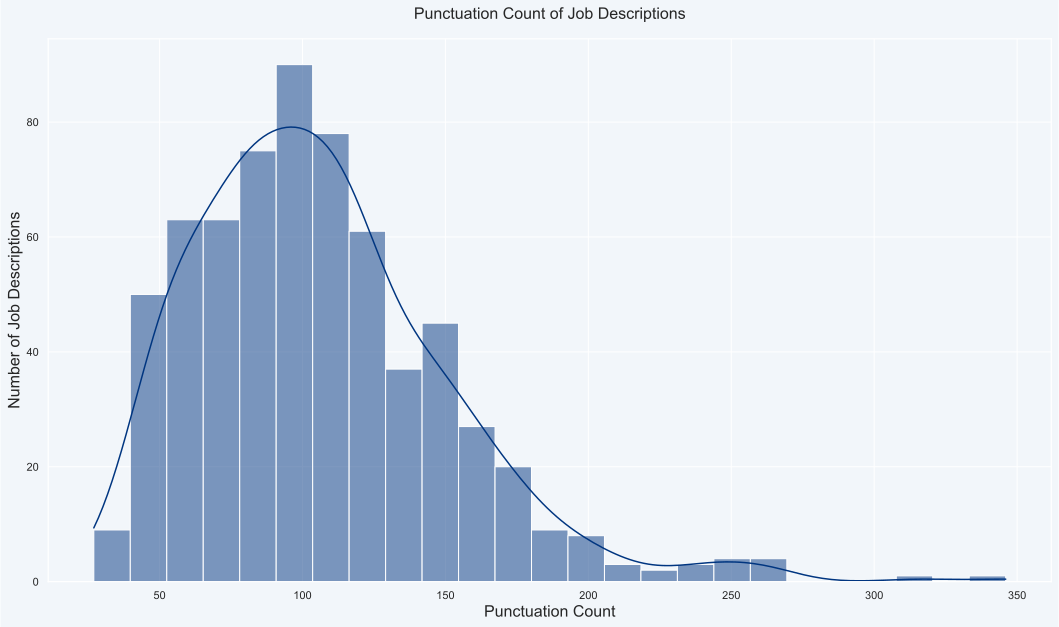

In [21]:
sns.histplot(data=df_stats_raw, x='R_punc_count', bins=25, palette=c1, kde=True)

plt.xlabel('Punctuation Count', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Punctuation Count of Job Descriptions', fontsize=16, pad=20);

In [22]:
print('The average punctuation count for a Job Description is {:.0f} punctuation marks'.format(df_stats_raw['R_punc_count'].mean()))
print('The highest punctuation count is for {}, with a total of {} punctuation marks'.format(df_stats_raw.iloc[df_stats_raw['R_punc_count'].idxmax()][0],df_stats_raw['R_punc_count'].max()))
print('The lowest punctuation count is for {}, with a total of {} punctuation marks'.format(df_stats_raw.iloc[df_stats_raw['R_punc_count'].idxmin()][0],df_stats_raw['R_punc_count'].min()))

The average punctuation count for a Job Description is 106 punctuation marks
The highest punctuation count is for Director Legal Trips - Product & Commercial, with a total of 346 punctuation marks
The lowest punctuation count is for Team Operations Coordinator, with a total of 27 punctuation marks


### Inference:
> - Generally, Job Descriptions have 106 punctuation marks
> - Unsurprisingly, there is a strong correlation between amount of punctuation marks and total words used

***

# Text Pre-processing

In order to prepare our text for analysis we need to transform it to be more meaningful. This process will look as follows:

>1. Create lowercase
>2. Tokenization
>3. Removing Stopwords
>4. Normalization 
>5. Removing Punctuation
>6. Character Removal

**1. Create lowercase**
The first step towards a cleaned text is removing obstacles that make comparison more difficult. An easy way to start is by using lowercase for all text to ignore capitalization.

**2. Tokenization**
Tokenisation is a technique for breaking down a piece of text into small units, called tokens. A token may be a word, part of a word or just characters like punctuation.

**3. Removing Stopwords**
Stopwords are frequently used words such as I, a, an, in etc. They do not contribute significantly to the information content of a sentence, so it is advisable to remove them by storing a list of words that we consider stopwords. The library nltk has such lists for 16 different languages that we can refer to.

**4. Normalization**
Text normalization tries to reduce the randomness in text and bring it closer to a predefined standard. This has the effect of reducing the amount of different information and thus improving efficiency. There are two methods for this:

1. Stemming: reducing words to their root or root form (e.g. _Caring_ becomes _Car_)
2. Lemmatization: reducing words to their base word (e.g. _Caring_ becomes _Care_)

The aim of these normalization techniques is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. However, the lemmatization algorithms try to reduce the inflected words correctly so that the affiliation of the base word to the language is guaranteed. This aligns better with our project goals, so we'll only use lemmatization as a normalization technique.

Lemmatization uses context to establish which grammatical group a word belongs to (noun, adjective, verb, etc.), called Part-of-speech tagging (POS tagging). Because only one of these tags can be applied when lemmatizing **we start by creating a function that aims to find the correct POS tag before cleaning the text.**

**5. Removing Punctuation**
Punctuation is essentially a set of symbols that offer little in terms of understanding our text as words. Tokenization splits text into words, but it also into punctuation marks. So removing these symbols creates a set of words and parts of words whilst removing the noise.

**6. Character Removal**
After tokenization and the removal of punctuation we can still be left with single/double characters. Most of these will be of no added value to our analysis, with the exception of the programming language R.

In [23]:
def get_pos_func(word):
    '''
    Maps the respective POS tag of a word to the format accepted by the Wordnet lemmatizer
    
    Args:
        word (str): Word to which the function is to be applied
    
    Returns:
        POS tag, readable for the Wordnet lemmatizer
    '''     
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [24]:
def clean_string_func(text, x):
    '''
    Create cleaned text or list of words
    
    Step 1: Use word_tokenize() to get tokens from lowered string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
            POS tag is determined with the help of function get_wordnet_pos()
    Step 3: Remove stopwords by iterating through tokens
    Step 4: Remove single characters by iterating through tokens
    Step 5: Remove punctuation by iterating through tokens
    Step 6: Join words to create text
    
    Args:
        text (str): String to which the functions are to be applied, string
        x (str): Letter that denotes return type ('w' = words, otherwise text)
    
    Returns:
        List of lemmatize words
        String with lemmatized words
    ''' 
    words = word_tokenize(text.lower()) #Create tokens from text and transform to lowercase
    words = [WordNetLemmatizer().lemmatize(word, get_pos_func(word)) for word in words] #Lemmatize words through appropriate POS from get_pos_func
    words = [wrd for wrd in words if wrd not in stopwords.words('english')] #Remove all words that appear in stopword list
    words = [wrd for wrd in words if len(wrd) > 1 and len(wrd) != 'r'] #Remove single character words that's not programming language R
    words = [wrd for wrd in words if wrd not in string.punctuation] #Remove punctuation
    text = ' '.join(words) #Join words to create text

    if x == 'w':
        return words
    return text

Let's take a look at what a Job Description looks like before and after cleaning:

In [25]:
print('Original text: \n{}'.format(df['Job Description'][0][:500]))

Original text: 
Booking.com It wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone. In fact, that’s what we do at Booking.com. We make it easier for everyone to experience the world. And while that world might feel a little farther away right now, we’re busy preparing for when the world is ready to travel once more. Across our offices worldwide, we co


In [26]:
print('Cleaned text: \n{}'.format(clean_string_func(df['Job Description'][0],'t')[:500]))

Cleaned text: 
booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission un


***

## Baseline revisited: Comparing Raw to Cleaned text

In [27]:
df['Job Description - Cleaned'] = df['Job Description'].apply(lambda x : clean_string_func(x,'t')) #Create new column of cleaned job descriptions

In [28]:
df['C_word_count'] = df['Job Description - Cleaned'].apply(lambda x : len(x.split())) #Splitting strin into words
df['C_char_count'] = df['Job Description - Cleaned'].apply(lambda x : len(x.replace(' ',''))) #Removing spaces and counting characters
df['C_word_density'] = df['C_word_count'] / (df['C_char_count'] + 1) #Devide total words by number of characters
df['C_punc_count'] = df['Job Description - Cleaned'].apply(lambda x : len([a for a in x if a in string.punctuation])) #Count punctuation by comparing to string.punctuation

In [29]:
df.head(3)

Job Title                   \
0  Junior Endpoints Engineer   
1            UX Writer - B2B   
2   Treasury Risk Specialist   

  Job Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \
0  Booking.com It wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone. In fact, that’s what we do at Booking.com. We make it easier for everyone to experience the world. And while that world might feel a little farther away right now, we’re busy preparing for when the world is ready to travel once more. Across our offices worldwide, w...   
1  At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world. We’re looking for a UX Copywriter to join our writin...   
2  Booking.com’s global treasury team is looking for a  Treasury risk management professional to join our growing team.  The Treasury Risk Specialist is responsible for performing financial analysis and operating processes relating to the identification, quantification, management and reporting of credit, counterparty, liquidity and other Treasury risk typologies that attach to Booking’s evolving business models, strategic initiatives and third party relationships.   The individual will form an...   

  Location                    Team                      Country          \
0  Manchester, United Kingdom               Engineering  United Kingdom   
1      Amsterdam, Netherlands  Design & User Experience     Netherlands   
2      Amsterdam, Netherlands                   Finance     Netherlands   

   R_word_count  R_char_count  R_word_density  R_punc_count  \
0  962           5727         0.17             161            
1  687           3757         0.18              77            
2  833           5203         0.16             106            

  Job Description - Cleaned                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             \
0  booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact missio...   
1  booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world look ux copywr

In [30]:
df_stats_raw = df[['R_word_count', 'R_char_count', 'R_word_density', 'R_punc_count']].copy() #Create dataframe containing statistical of raw data
df_stats_cleaned = df[['C_word_count', 'C_char_count', 'C_word_density', 'C_punc_count']].copy() #Create dataframe containing statistical of cleaned data

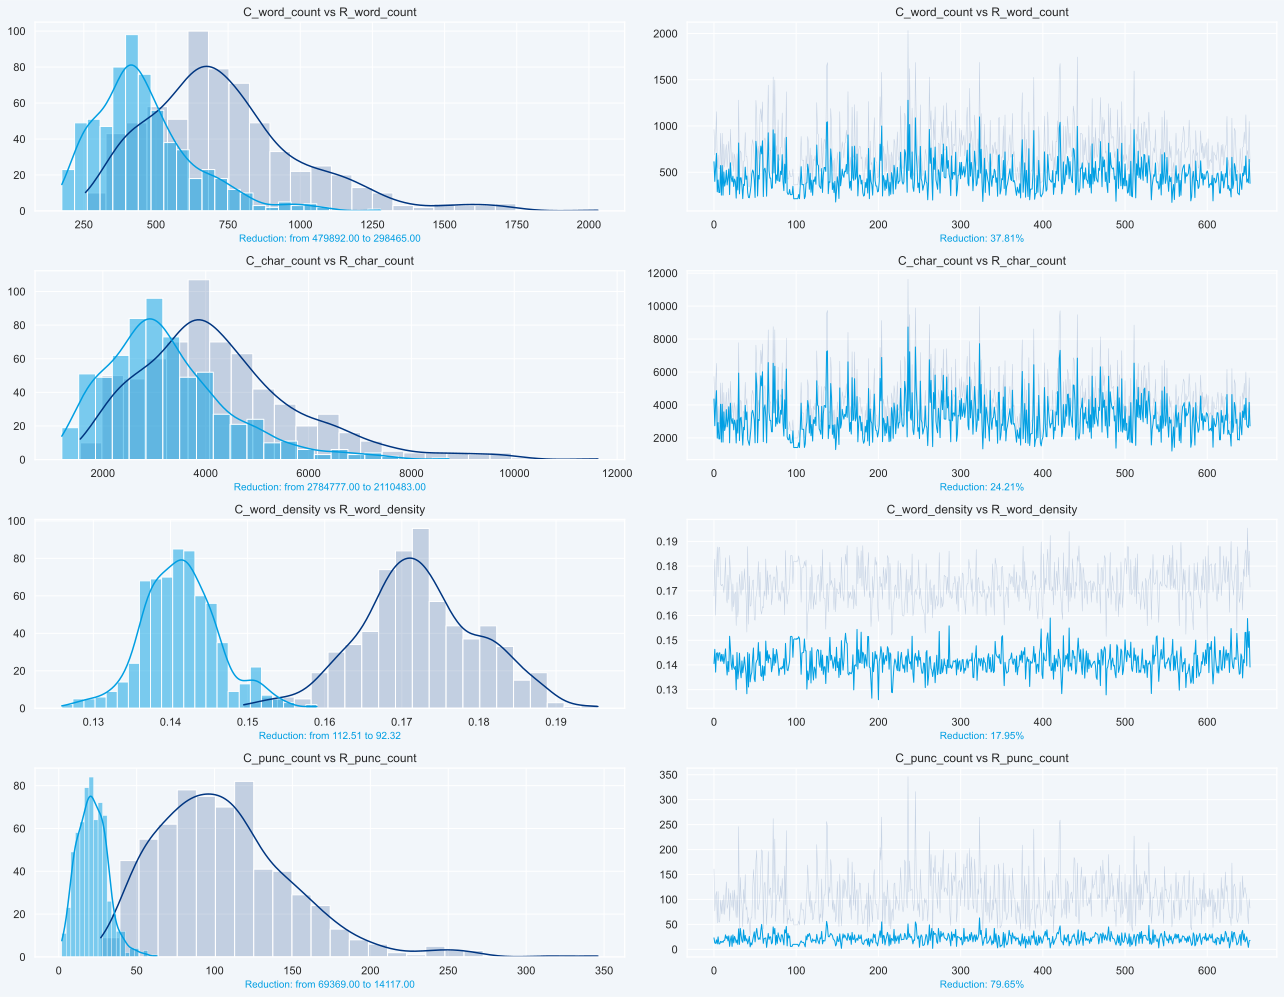

In [31]:
#Subplots
a = 4  #Number of rows
b = 2  #Number of columns
c = 1  #Initialize plot counter

fig = plt.figure(figsize=(18,14))

for i in range(4):
    
    #Bar plots
    plt.subplot(a, b, c)
    g1 = sns.histplot(data=df_stats_raw.iloc[:,i],color=blue_d, kde=True, alpha=.2)
    g2 = sns.histplot(data=df_stats_cleaned.iloc[:,i],color=blue_l, kde=True)
    
    #Bar labels
    g1.set_ylabel(None)
    g2.set_ylabel(None)
    g2.set_xlabel(('Reduction: from {:.2f} to {:.2f}'.format(df_stats_raw.iloc[:,i].sum(),df_stats_cleaned.iloc[:,i].sum())),fontsize=10 ,color=blue_l)
    g2.set_title('{}'.format(df_stats_cleaned.columns[i]+ ' vs ' + df_stats_raw.columns[i]))

    c = c + 1
    
    #Line plots
    plt.subplot(a, b, c)
    g3 = sns.lineplot(data=df_stats_raw, x=df_stats_raw.index, y=df_stats_raw.iloc[:,i], alpha=.2, linewidth=.5)
    g4 = sns.lineplot(data=df_stats_cleaned, x=df_stats_raw.index, y=df_stats_cleaned.iloc[:,i], linewidth=1)
    
    #Line labels
    g3.set_ylabel(None)
    g4.set_ylabel(None)
    g4.set_xlabel(('Reduction: {:.2f}%'.format(abs(((df_stats_cleaned.iloc[:,i].sum()-df_stats_raw.iloc[:,i].sum())/df_stats_raw.iloc[:,i].sum())*100))),fontsize=10,color=blue_l)
    g4.set_title('{}'.format(df_stats_cleaned.columns[i]+ ' vs ' + df_stats_raw.columns[i]))

    c = c + 1
    
plt.tight_layout()

### Inference:
> - After completing the text pre-processing phase we've successfully reduced noise and created more information dense descriptions
> - For every plot we see the Raw and Cleaned data matches in shape, meaning the reduction is mostly linear (higher word count raw means a higher word count cleaned)
> - Reductions of Word and Character count follow a similar pattern, as they are strongly correlated
> - The highest reduction rate is in Punctuation marks at ~81%, the other ~19% can be explained by contextual punctuation (Booking.com, state-of-the-art, etc.)

***

# Exploratory Analysis

Now that we have our cleaned Job Descriptions, let's look at the overall picture. What kind of things does Booking.com look for in their recruitment? 
We'll add everything together to find the most commonly used words on their career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees. To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

In [32]:
descriptions = ''.join(d for d in df['Job Description - Cleaned']) #Looping over all cells in Job Description column and joining then together
print ("There are {} words in the combined data-related job descriptions.".format(len(descriptions))) #Printing results

There are 2408295 words in the combined data-related job descriptions.


In [33]:
word_count = dict(Counter(descriptions.split())) #Creating a dictionary of all words in split description
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'booking.com': 2874, 'long': 161, 'ago': 171, 'book': 1026, 'trip': 622, 'see': 577, 'eiffel': 136, 'tower': 136, 'stroll': 132, 'new': 1449}


In [34]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Creating dictionary by most popular words by looping over our split descriptions dictionary
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'experience': 4165, 'work': 4081, 'team': 4021, 'business': 3080, 'product': 2980, 'booking.com': 2874, 'data': 1919, 'world': 1912, 'partner': 1801, 'opportunity': 1755}


In [35]:
words_all_jobs = pd.DataFrame.from_dict(words_popular, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs.head(10)

index         Count
0   experience  4165 
1         work  4081 
2         team  4021 
3     business  3080 
4      product  2980 
5  booking.com  2874 
6         data  1919 
7        world  1912 
8      partner  1801 
9  opportunity  1755

## Wordcloud

One way to make this intuitively insightful is to use a wordcloud, which displays the most common words in a visual manner. The size of each word corresponds to the frequency of its use.

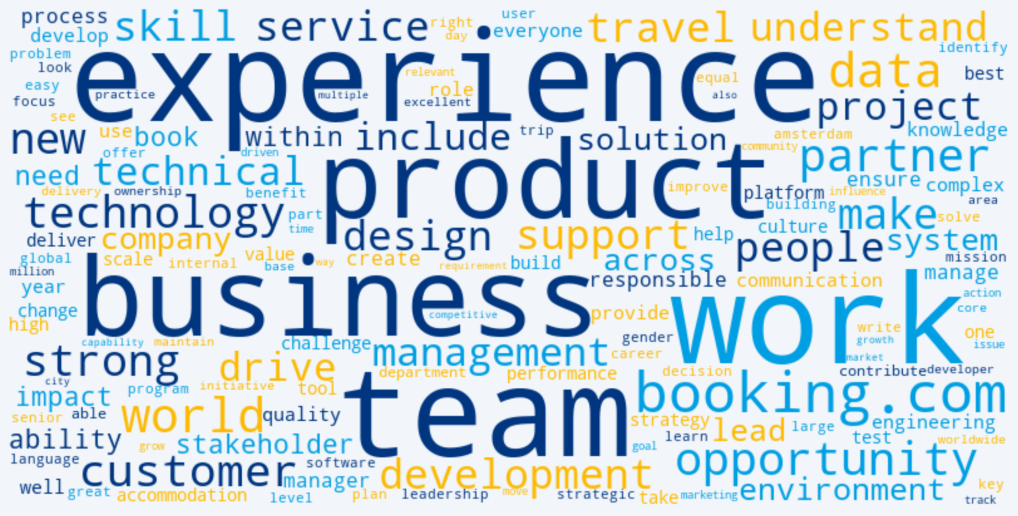

In [36]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular) #Generate wordcloud class from dictionary

plt.imshow(wordcloud.recolor(colormap=cmap3), interpolation='bilinear')
plt.axis('off')
plt.show();

### Inference:

> - A few words pop out immediately (Experience, Business, Team, Product, Work), so it's worth paying closer attention to the 'secondary' words as well.
> - **(Machine) Learning**: A general machine learning trend?
    - Treating these as seperate words loses out on possible overlap and will require further research
    - Correlation? Machine is often found in combination with Intelligence, Learning often turns up before Models and Code.
    - Overall, 'Machine' hints at strong ML-focus since it's a word rarely used outside of this context (in job positions).
    - Representation - How many jobs are ML-related and how much does this skew our vision of general Booking.com jobs descriptions?
> - **World**: as one of the world’s leading digital travel companies this emphasizes their global presence and state of mind.
> - **Empowerment**: we see a high frequency of words aligning with Booking.com values like: Vision, Development, Identify, Impact, and Ownership.

### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 50 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

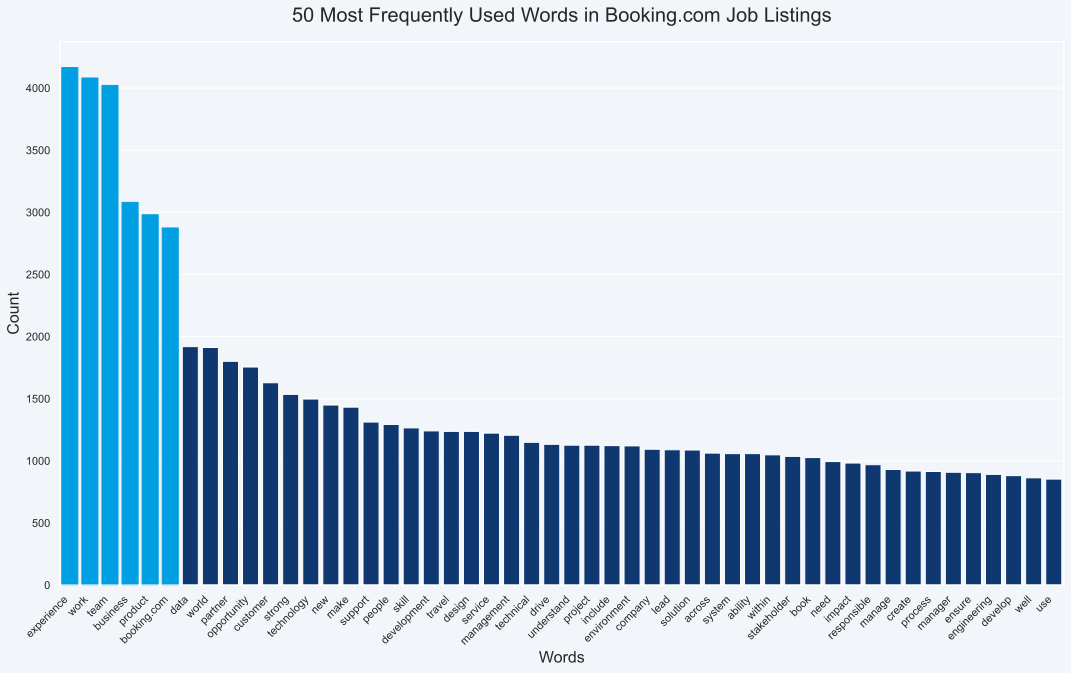

In [37]:
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Count',palette=c1)

for bar in ax.patches:
    if bar.get_x() < 5:
        bar.set_color(blue_l)

plt.xticks(rotation= 45, ha='right')
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('50 Most Frequently Used Words in Booking.com Job Listings', fontsize=20, pad=20);

##### **Q:** How big a percentage of all words used is a Top 6 Word?

In [38]:
print('A: {:.2f}%'.format((words_all_jobs['Count'][:6].sum()/words_all_jobs['Count'].sum())*100))

A: 7.12%


Let's calculate the ratio of each of these words per job listing.

In [39]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/df.shape[0] #Creating new column for ratios
words_all_jobs

index                   Count  Ratio_Listings
0                experience  4165  6.38           
1                      work  4081  6.25           
2                      team  4021  6.16           
3                  business  3080  4.72           
4                   product  2980  4.56           
...                     ...    ...             ...
7138    compliance-ensuring     1  0.00           
7139  business-intelligence     1  0.00           
7140             repetitive     1  0.00           
7141     organisationsenior     1  0.00           
7142          dbbooking.com     1  0.00           

[7143 rows x 3 columns]

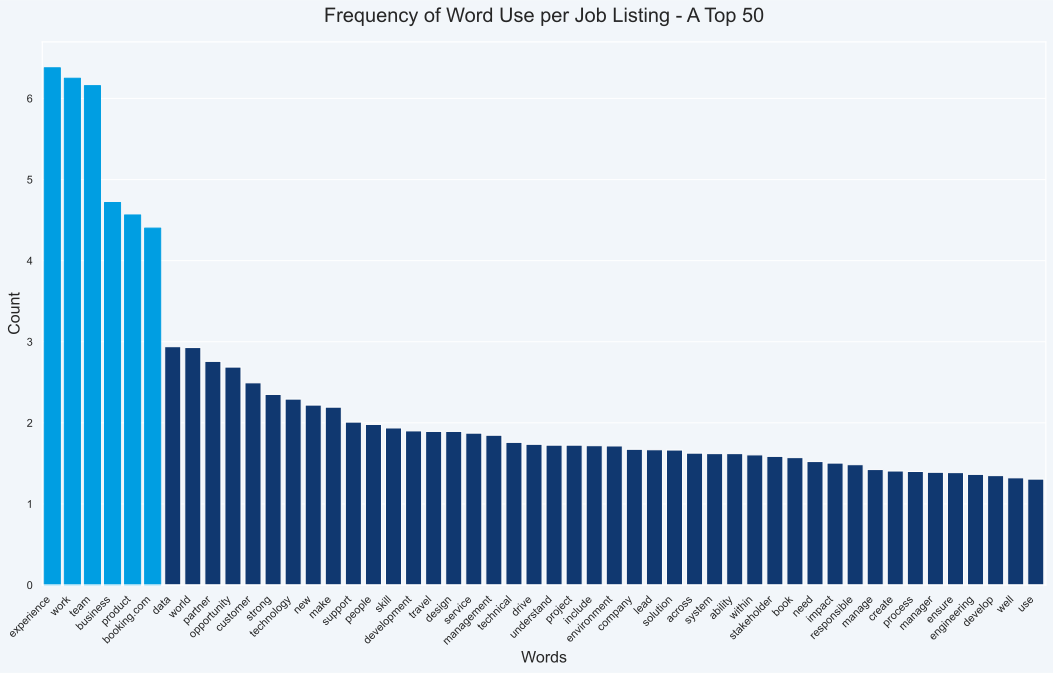

In [40]:
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Ratio_Listings', palette=c1)

for bar in ax.patches:
    if bar.get_x() < 5:
        bar.set_color(blue_l)    

plt.xticks(rotation = 45, ha= 'right')
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Frequency of Word Use per Job Listing - A Top 50', fontsize=20, pad=20);

In [41]:
print(('Top 6 words are at least {:.2f} times more likely to be used in Job Descriptions').format(words_all_jobs['Ratio_Listings'][5]/words_all_jobs['Ratio_Listings'][6]))

Top 6 words are at least 1.50 times more likely to be used in Job Descriptions


### Inference:

> - The differences between the 6 most used words and the rest is substatial, almost **7,2%** of all words* used is Experience, Work, Team, Business, Product or  Booking.com
> - Top 6 words are at least **1,5 times** more frequenty than other words
> - Top 6 words are all used **over 4 times** per job listing, with the top 3 used of **6 times** (on average)
    
***    
\* _'all words' refers to the cleaned word list, excluding all stopwords. This means the percentages do not represent an absolute, but rather relative number._

***

## Job Descriptions

Could we also surmize the Team category using Job Descriptions? This could also strengthen our understanding of what lies behind the categorization. We could approach this in different ways:
- Analyze the Job Descriptions and use this to understand what the category it fits into
- Classification through algorithms such as K-Means by creating features that can be clustered


In order to sort Job Descriptions by similarity we can use something else - the Booking.com Career platform has a handy set of teams it uses to sort by.

<p align="center">
<img src="Images/booking_teams.jpg" style>
</p>

Job positions generally do not fall exclusively in one category, so there will be a lot of overlap. Sorting a Job Title like 'Data Analyst' in the 'Data Science & Analytics' seems intuitive, but where does 'Senior Data Engineer - Data & Machine Learning Platform' fall? In order to categorize, we have to generalize.

### Bag-of-Words (BoW)

For this approach we'll start with using a Bag-of-Words model, which is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a bag-of-words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [43]:
#Creating dictionary of teams and skills from Booking.com career platform
skills_dict = {
    
        'Business Development & Support': [
                                            'Communication', 'Positioning', 'Business Development','Planning',
                                            'Customer Service', 'Reporting', 'Account Management', 'Governance',
                                            'Agile', 'Change Management', 'Compliance', 'Risk Assessment','People Management', 
                                            'Innovation', 'Strategy', 'Service Delivery', 'Networking', 'Technology', 'Integration' 
                                            ],

        'Customer Service': [
                            'Customer Service', 'Training', 'Microsoft Office', 'Sales', 'Communication', 'Languages', 'Investments'
                            ],

        'Data Science & Analytics': [
                                    'Sql', 'Python', 'Data Analysis', 'Tableau', 'Data Science', 'Visualization', 'Insights', 
                                    'Artificial Intelligence', 'Analytics', 'Hadoop', 'Spark', 'Statistics', 'Implementation', 
                                    'Data Management', 'Dashboards', 'Machine Learning', 'Graphite', 'Strategy', 'Forecasting',
                                    'Engineering', 'Metrics', 'Data Modelling'
                                    ],
        
        'Design & User Experience':[
                                    'Testing', 'Agile', 'Design Process', 'Mentoring', 'Six Sigma', 'Product Development', 
                                    'Saas', 'Prototyping', 'Css', 'Html', 'Copywriting', 'User Flows', 'Product Design',
                                    'Adobe', 'Research', 'Invision', 'Ios', 'Android', 'User Experience'
                                    ],
               
        'Engineering': [
                        'Engineering', 'Agile', 'Devops', 'Kubernetes', 'Java', 'Programming', 'Software Development',
                        'Cloud', 'Spring', 'Documentation', 'Soa', 'Technical Leadership', 'Jenkins', 'Ci/cd', 'Aws',
                        'Architecture', 'Machine Learning', 'Infrastructure', 'Product Development', 'Integration',
                        'Mentoring', 'Linux', 
                        ],
               
        'Finance': [
                    'Finance', 'Documentation', 'Risk Management', 'Compliance', 'Financial Analysis', 'Reporting',
                    'Audit', 'Accounting', 'Treasury', 'Pmp', 'Change Management', 'Planning', 'Financial Planning',
                    'Consolidation', 'Variance Analysis', 'Governance', 'Marketing', 'Operations', 'Sap', 'Forecasting' 
                    ],

       'Finance & Legal': [         
                            'Sap', 'Finance', 'Financial Reporting', 'Negotiation', 'Excel', 'Forecasting', 'Reporting',
                            'Risk Management', 'Audit', 'Process Improvement', 'Litigation', 'Internal Audit',
                            'Public Relations', 'Pricing', 'Investigation', 'Analysis', 'Swift', 'Modeling',
                            'Variance Analysis','Cost Control'
                           ],
               
        'IT Services': [
                        'Active Directory', 'Technical Support', 'Troubleshooting', 'Python', 'Configuration', 
                        'Testing', 'Logging', 'Vpn', 'Itil', 'Deployment', 'Maintenance', 'Planning',
                        'Wireless', 'Security', 'Installation', 'Wan', 'Life Cycle', 'Sdlc', 'Technology',
                        'Scrum', 'Documentation', 'Agile', 'Finance', 'Authentication', 'Powershell',
                        'Oauth', 'Api', 'Scripting', 'Git', 'Innovation'
                        ],
          
        'Leadership': [
                        'Engineering','Software Development', 'Strategy', 'Technology', 'Leadership',
                        'Product Management', 'Cloud', 'Infrastructure', 'Implementation', 'Training',
                        'People Management', 'Architecture', 'Designing', 'Devops', 'Agile', 'Api',
                        'E-commerce', 'Software', 'Software Engineering', 'Horizontal'
                        ],      
        
        'Legal & Public Affairs': [
                                    'Litigation', 'Regulatory', 'Compliance', 'Negotiation', 'Drafting',
                                    'Product', 'Governance', 'Corporate Law', 'Due Diligence', 'Fintech',
                                    'E-commerce','Payments' 
                                    ],     
               
               
        'Marketing & Communications': [
                                    'Social Media', 'Marketing', 'E-commerce', 'Media Engagement', 
                                    'Branding', 'Content Management', 'Editing', 'Crm', 'Campaign', 
                                    'Segmentation', 'Positioning', 'Strategy', 'Copywriting', 'Planning',
                                    'Communications', 'Regulatory', 'Compliance', 'Project Management',
                                    'B2b Marketing', 'Marketing Communications', 'Campaigns', 'Translation'
                                    ],
  
        'People': [
                    'Employee Relations', 'Talent Acquisition', 'Performance Management', 'Stakeholder Management', 
                    'Onboarding', 'Talent Management', 'Organizational Development', 'Workday', 'Administration', 
                    'Hr Process', 'Hr Operations', 'Hris', 'Hr', 'Relationship Management', 'Strategy', 'Change Management',
                    'Training', 'Training And Development', 'Metrics', 'Pmp Certification'
                    ],
           
        'Product': [
                    'Product Management', 'Product Design', 'Project Management', 'Product Development', 
                    'Api', 'Product Lifecycle', 'Product Delivery', 'Product Strategy', 'Collaboration',
                    'Agile', 'Strategy', 'Engineering', 'Product Launch', 'Communication', 'Metrics', 'Sql',
                    'Ux Design', 'Testing', 'Payments', 'Ci/Cd', 'Pipelines', 'Grafana'
                    ],
        
        'Security & Infrastructure': [
                                    'Linux', 'Networking', 'Security', 'Ansible', 'Cloud Computing', 'Automation', 
                                    'Infrastructure', 'Architecture', 'Docker', 'Distributed Systems', 'Mysql', 
                                    'Terraform', 'Openstack', 'Perl', 'Engineering', 'Programming', 'Troubleshooting',
                                    'Software Development', 'Monitoring', 'Python', 'Jenkins'
                                    ]
        }

Let's first find out which keywords pop up in the Job Descriptions per Team

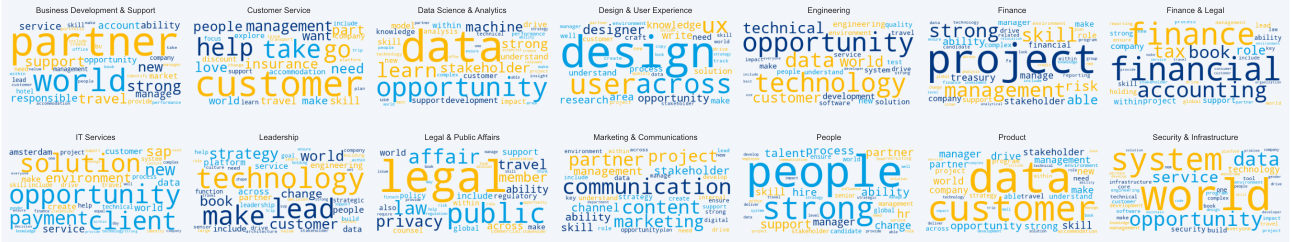

In [44]:
fig = plt.figure(figsize=(18,4))
count = 1
for key in skills_dict.keys():
    descriptions = ''.join(d for d in df[df['Team']==key]['Job Description - Cleaned'])
    word_count = dict(Counter(descriptions.split())) #Creating a dictionary of all words in split description
    words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Creating dictionary by most popular words by looping over our split descriptions dictionary
    words_popular = {k: v for k, v in words_popular.items() if k not in {'experience', 'work', 'team', 'business', 'product', 'booking.com'}} #Removing top 6 words

    wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular) #Generate wordcloud class from dictionary

    ax = plt.subplot(2, 7, count)

    plt.imshow(wordcloud.recolor(colormap=cmap3), interpolation='bilinear')
    plt.title(key, fontsize=8, pad=8)

    ax.imshow(wordcloud)
    ax.axis('off')

    count = count + 1
    
plt.tight_layout(pad=.8)

Let's clean up our dictionary so that it matches our Job Descriptions.

In [45]:
def clean_dict(text, x):
     
    words = skills_dict[text] #Set skills to matching skill-set (values) of dictionary
    words = [x.lower() for x in words] #Lower words to match Job Description
    words = ' '.join(words) #Join to create list
    words = list(set(str(words).split())) #Create split list of words and remove duplicates
    words = [WordNetLemmatizer().lemmatize(word, get_pos_func(word)) for word in words] #Lemmatize words through appropriate POS from get_pos_func
    words = [wrd for wrd in words if wrd not in stopwords.words('english')] #Remove all words that appear in stopword list
    words = [wrd for wrd in words if len(wrd) > 1 and len(wrd) != 'r'] #Remove single character words that's not programming language R
    words = [wrd for wrd in words if wrd not in string.punctuation] #Remove punctuation
    words = list(dict.fromkeys(words))
    #text = ''.join(words) #Join words to create text

    if x == 'w':
        return words
    return text

In [46]:
skills_dict_clean = {key:(clean_dict(key,'w')) for (key, value) in skills_dict.items()}

In [47]:
df_team = df[['Job Title','Job Description - Cleaned']].copy() #Creating new dataframe with only Job Title and Description

In [48]:
def skill_finder(team):
    df_team[team] = 0 #Settings initial value to 0
    skills = skills_dict_clean[team] #Set skills to matching skill-set (values) of dictionary   

    for i in range(df_team.shape[0]): #Looping through all rows of df
        description = df_team['Job Description - Cleaned'][i] #Getting Cleaned Job Description
        for j in range(len(skills)): #Looping through dictionary of skills
            if skills[j] in description: #Comparing list of skills to words in Job Descriptions
                df_team[team][i] += 1 #Adding 1 to all matches

    return df_team

In [49]:
#Iteraring through skills dictionary and calling skill_finder() on each key
for key,value in skills_dict_clean.items():
    skill_finder(key)

df_team.head(10)

Job Title                                       \
0                      Junior Endpoints Engineer   
1                                UX Writer - B2B   
2                       Treasury Risk Specialist   
3     Product Manager - Insurance - Policy Admin   
4                 Account Executive - Manchester   
5      Senior Android Developer - Accommodations   
6  Account Executive - Nairobi (Amharic Speaker)   
7   Account Executive - Nairobi (French Speaker)   
8                        Client Manager, FinTech   
9         Senior Data Scientist - Accommodations   

  Job Description - Cleaned                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             \
0  booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact missio...   
1  booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world look ux copywriter join write team marketing support business travel department close-knit write community make around 15 writer creative copywriter ux writer collaborate across product integrate marketing campaign goal deliver sea...   
2  booking.com global treasury team look treasury risk management professional join grow team treasury risk specialist responsible perform financial analysis operating process relate identification quantification management reporting credit counterparty liquidity treasury risk typology attach book evolve business model strategic initiative third party relationship individual form integral part treasury risk team reporting treasury manager function prefer candidate accustom work fast pace enviro...   
3  company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission un...   
4  account executive bristol full time position base amaze manchester office company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment bel...   
5  job booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people empower everyone experience world accommodation technology team responsible design delivery reliability service use million customer partner web via mobile e

We've created a dataframe that scores Job Descriptions based on their resemblance to the Booking.com Teams and Skills dictionary. The next step is to explore it as a means of categorization.

In [50]:
df_team_num = df_team.drop(columns=['Job Title', 'Job Description - Cleaned']).copy() #Creating a copy with only numeric values

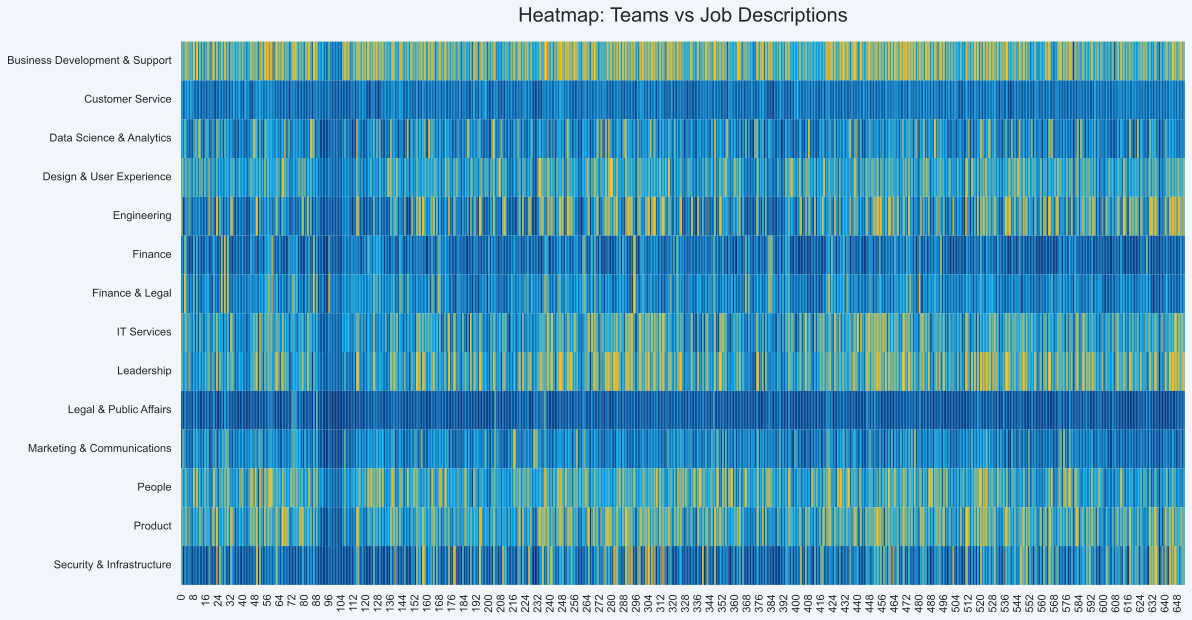

In [51]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c4, N=256) #Creating cmap from Booking.com colors
g = sns.heatmap(df_team_num.T,cbar=False, cmap=cmap)
g.set_title('Heatmap: Teams vs Job Descriptions',fontsize=20, pad=20);

How can we explain the dip of skill score between rougly Job Title 90-100?

In [52]:
df_team.iloc[93:110]['Job Title']

93             Customer Sales Advisor - English Speaker
94              Customer Sales Advisor - German Speaker
95             Customer Sales Advisor - Italian Speaker
96              CS Internal Control Quality Team Leader
97                 Customer Relations Advisor (Turkish)
98                  Customer Relations Advisor (Korean)
99                  Customer Relations Advisor (French)
100                Customer Relations Advisor (English)
101                  Customer Relations Advisor (Dutch)
102                 Customer Relations Advisor (Danish)
103            Customer Sales Advisor - Spanish Speaker
104                  Customer Relations Advisor (Czech)
105     Customer Relations Advisor - Insurance (French)
106        Program Manager - Digital Partner Experience
107    Customer Relations Advisor - Insurance (Swedish)
108     Customer Relations Advisor - Insurance (German)
109      Customer Relations Advisor - Insurance (Dutch)
Name: Job Title, dtype: object

It turns out these are all Customer Relations Advisors where the Job Descriptions is generally a copy of the text below, adjusted by language. These Job Descriptions are some of the shortest (at 250 words) and mean skill score of 3. Suprisingly, they don't score all that well on Customer Service - the team they've been categorized into.

In [53]:
df['Job Description'][94]

'Customer Sales Advisor – German Speaker Booking.com Transport Business Unit We’re on a mission to make it easier for everyone to experience the world. Whether they’re heading straight from A to B or enjoying the freedom to go wherever their journey takes them. We’re part of the worldwide Booking.com family. We speak 42 languages, our staff (in Manchester) come from all over the world, just like our customers. What brings us together is our love of adventure. It’s easy to be enthusiastic about a job that enriches so many lives on a daily basis, and our workplace reflects our diversity and global focus. If you’re like us, you’ll love to help people. You’ll love travel and new life experiences too. Put these drives together and you get an international team who’ll take problems and turn them into solutions, increasing customer satisfaction and helping to grow our international business. What you’ll be doing: Helping customers to book their worldwide car hire, giving a consultative, tailo

In [54]:
for col in df_team_num.columns:
    val = df_team_num[col].sum()

    print('{} - {}'.format(col,val))

Business Development & Support - 6334
Customer Service - 2315
Data Science & Analytics - 3486
Design & User Experience - 4691
Engineering - 4166
Finance - 2229
Finance & Legal - 3248
IT Services - 4622
Leadership - 5263
Legal & Public Affairs - 1279
Marketing & Communications - 2955
People - 5080
Product - 5097
Security & Infrastructure - 3152


### Inference:

> - Skill scores differ a lot per team - from 1279 (Legal & Public Affairs) to 6334 (Business Development & Support)
> - Business & Development, Leadership, Product and People score best, meaning most commonality between skill dictionary and Job Description
> - Customer Relations jobs score low on our skill dictionary
> - Variaty in Skill score per Team is, in part, a consequence of representation (i.e. there being many more jobs in one category over another)
> - Variaty in Skills score can also be explained by key words offered in the dictionary (i.e. more general words have a higher frequency)

In order to get more insight into how individual Job Descriptions rate we plot them individually. Radar plots can help us understand how each job listing scores. As means of categorization we take start with the obvious approach; which is to sort a job into the category it scores highest.

In [55]:
#Determining what treshhold to use for visualizing that balances skills vs legibility
#This also immediately shows which teams require the most specialized roles (Engineering and Security & Infrastructire)
treshold = 15 #Counter

print('With a Treshhold of {} we drop the following data:\n'.format(treshold))

for col in df_team_num.columns:
    val = df_team_num[col].value_counts().sort_index()

    print('{} - {:.2f}% of data'.format(col,((val[val.index > treshold].values.sum())/val[val.index < treshold+1].values.sum())*100))

With a Treshhold of 15 we drop the following data:

Business Development & Support - 3.32% of data
Customer Service - 0.00% of data
Data Science & Analytics - 2.19% of data
Design & User Experience - 0.31% of data
Engineering - 2.67% of data
Finance - 0.31% of data
Finance & Legal - 0.31% of data
IT Services - 0.31% of data
Leadership - 0.93% of data
Legal & Public Affairs - 0.00% of data
Marketing & Communications - 0.00% of data
People - 0.31% of data
Product - 0.15% of data
Security & Infrastructure - 3.82% of data


In [56]:
def radar_plot(f1,f2,df,dic,row,col,treshold,v):
    '''
    Create radar plots from Dataframe
    
    Step 1: Create labels from given dictionary
    Step 2: Define angles and create closes circle
    Step 3: Define colors
    Step 4: Loop through subplots by given row and column
    Step 5: Plot Radar plots
    
    Args:
        f1 (float): Figure width 
        f2 (float): Figure height 
        df (DataFrame): Data to plot
        dic (dict): Labels/categories
        row (int): Number of rows to plot
        col (int): Number of columns to plot
        treshold (int): Y-limit of bars
        v (str): Verbose option by using 'v'
    
    Returns:
        Radar plots
    '''
    fig = plt.figure(figsize=(f1,f2))
    
    labels = np.array(list(dic.keys())) #Creating labels from team names
    
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) #Defining angles
    angles = np.concatenate((angles,[angles[0]])) #Concatenating angles to create full loop
    
    count = 1
    dimensions = row*col
    
    #Colors
    cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c2, N=treshold) #Creating cmap from color list - change to c2 for Booking.com colors
    norm = mpl.colors.Normalize(vmin=0, vmax=treshold) #Create normalization

    for i in range(dimensions):

        #Bar plots
        ax = plt.subplot(row, col, count, projection='polar')

        stats = df.loc[i,labels].values.astype(np.int64) #Creating list of stats from team column
        stats = np.concatenate((stats,[stats[0]])) #Concatenating stats to create full loop
        colors = cmap(norm(stats)) #Normalize colors to match data to cmap
                
        #Plot
        ax.set_theta_offset(np.pi / 2) #Rotating plot
        ax.set_ylim(0, treshold) #Setting y limits
    

        if v == 'v':
            ax.bar(angles, stats, color=colors, width=.45, zorder=0)

            ax.xaxis.grid(True) #Turning on x axis
            ax.yaxis.grid(True) #Turning on x axis
            ax.yaxis.set_visible(True)
            ax.set_title(df.iloc[i][0], fontsize=18,pad=10) #Setting title
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(labels, size=12)
            ax.tick_params(axis='x', pad=60, zorder=1)
            ax.vlines((angles), 0, treshold, color=grey, ls=(0, (4, 4)), zorder=50)
                
        else: 
            ax.bar(angles, stats, color='#f2f6fa', width=.45, zorder=0)
            ax.xaxis.grid(False) #Turning off x axis
            ax.yaxis.grid(False) #Turning off x axis
            ax.yaxis.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.set_facecolor(color = c15[stats.argmax()])
    
        count = count + 1
    
    return plt.tight_layout(pad=.8)

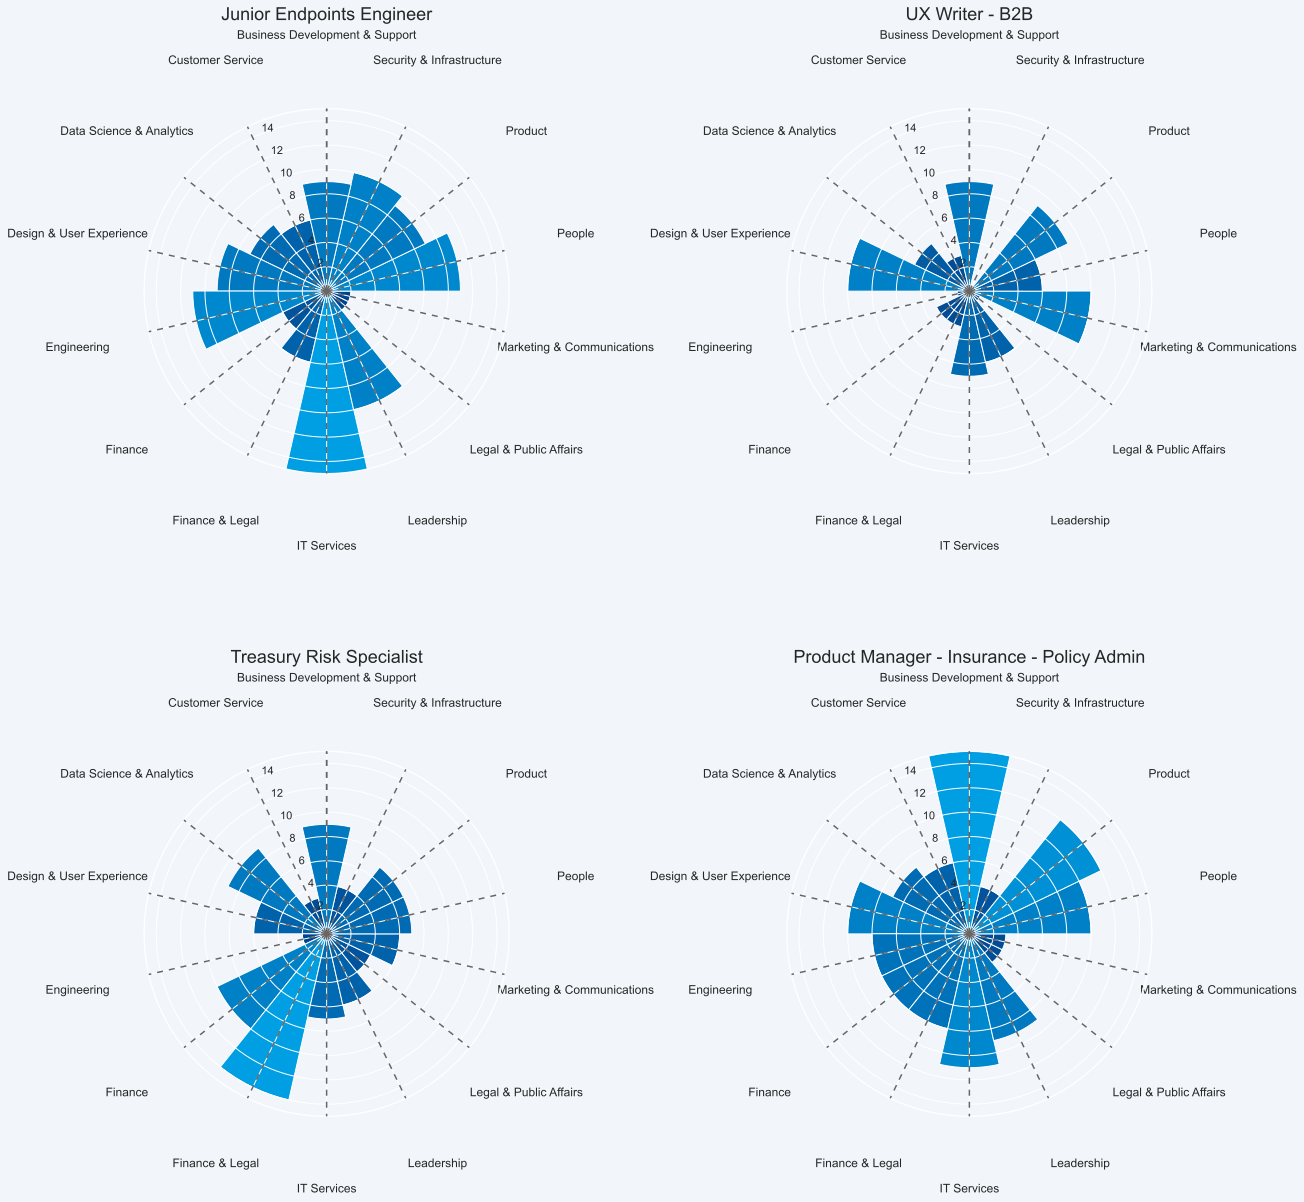

In [57]:
radar_plot(18,18,df_team,skills_dict_clean,2,2,15,'v')

We can see that Job Descriptions score in multiple Team categories. Some are generalists and other highly specialized, which is reflected in the plot. In order to use it as a means for categorization, we color code each Team and plot the radar plots for all jobs.

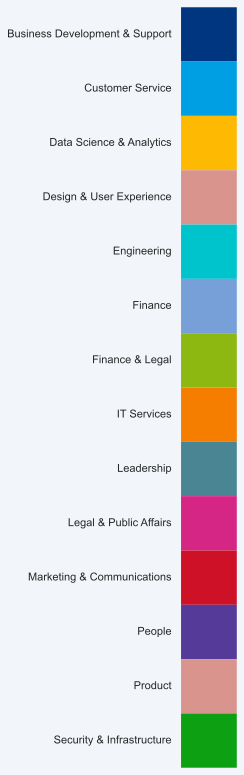

In [58]:
#Creating simple Color bar to serve a legend for radar plots
df_color = df_team_num.head(1).copy()
df_color.iloc[0] = np.arange(14)

fig = plt.figure(figsize=(1,14))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c15, N=14) #Creating cmap from Booking.com colors
g = sns.heatmap(df_color.T,cbar=False, xticklabels=False, cmap=c15[:-1])

In [ ]:
radar_plot(18,18,df_team,skills_dict_clean,26,25,15,'x')

### Inference:

> - The colorful confetti suggests that using the provided skillsets as indicators for indicating Teams offers a view of overall jobs being well balanced, with an overhand of jobs within the Business Development & Support team.
> - Legal & Public Affairs and Customer Support do not show up once on this plot, which could be because it too much overlap in skills with orther teams
> - Jobs in Engineering, Data Science & Analytics and Security & Infrastructures seem most specialized as suggesting by bar heights in respective skill


***
#### Comments:
> - The chosen method of using argmax() to pick category return only one value. This creates bias as plots with equal scores in two categories will default to the first occurance
> - The dictionary method is biased towards jobs requiring hard skills, as it offers only a limited set of skills which doesn't cover many softer skills
> - For graphic reasons ~0.5% of data has been omitted (3 jobs), these cases will be included in further analysis


## A closer look at top jobs

Which jobs require the most skills?

In [ ]:
df_team['Score'] = df_team_num.sum(axis=1)
df_score = df_team.sort_values(by='Score',ascending=False).copy()
df_score[['Job Title', 'Score']].head(10)

In [ ]:
df_score.reset_index(inplace=True)
df_score.drop(columns='index', inplace=True)
radar_plot(12,12,df_score,skills_dict,1,1,22,'v')

Which jobs require the most genelar skills?

In [ ]:
df_team['Score_median'] = df_team_num.median(axis=1)
df_median = df_team.sort_values(by='Score_median',ascending=False).copy()
df_median[['Job Title', 'Score_median']].head(10)

In [ ]:
df_median.reset_index(inplace=True)
df_median.drop(columns='index', inplace=True)
radar_plot(12,12,df_median,skills_dict,1,1,22,'v')

Which jobs require the most specific skills?

In [ ]:
df_team['Score_max'] = df_team_num.max(axis=1)
df_max = df_team.sort_values(by='Score_max',ascending=False).head(10)
df_max[['Job Title', 'Score_max']].head(10)

In [ ]:
df_max.reset_index(inplace=True)
df_max.drop(columns='index', inplace=True)
radar_plot(12,12,df_max,skills_dict,1,1,22,'v')

# Predicted value vs True value comparison

In [ ]:
df_pred = df_team_num.copy()
df_pred['Team_pred_max_score'] = df_team_num.idxmax(axis=1)
df_pred[['Team','Job Title']] = df[['Team','Job Title']]
df_pred = df_pred[['Job Title','Team','Team_pred_max_score']]
df_pred['Match']=df_pred.apply(lambda x: 1 if x['Team'] == x['Team_pred_max_score'] else 0,axis=1) #Adding a Match column for every correct guess
df_pred

In [ ]:
print('Using the highest skills rating as means of classifying teams yields us a correct predcition rate of {:.2f}%'.format((df_pred['Match'].sum() / df_pred.shape[0])*100))

In [ ]:
df_pred_correct = df_pred[df_pred['Match'] == 1].groupby(by='Team')['Team'].count()
correct = (df_pred_correct / df_pred.shape[0]) * 100
print('{}\n\nTotal correct predictions: {:.2f}%'.format(correct,correct.sum()))

In [ ]:
df_pred_wrong = df_pred[df_pred['Match'] == 0].groupby(by='Team')['Team'].count()
wrong = (df_pred_wrong / df_pred.shape[0]) * 100
print('{}\n\nTotal wrong prediction: {:.2f}%'.format(wrong,wrong.sum()))

In [ ]:
ax = sns.scatterplot(data=df_pred,x='Job Title',y='Team',color=yellow,alpha=1, size=300)
sns.scatterplot(data=df_pred,x='Job Title',y='Team_pred_max_score',color=yellow,alpha=.6,hue='Match',size='Match',sizes=[500,200],size_order=[1,0])

plt.title('Team Categorization from Job Descriptions - Predicted vs Actual', fontsize=20, pad=20);
plt.legend(['Actual', 'Predicted Incorrectly', 'Predicted Correctly']);
ax.set_xticklabels([]);

### Inference:

> - Using Bag-of-Words (BoW) metholodgy gains us a meager **45%** correct prediction rate.
> - Job Descriptions with fewer words, fewer keywords and are generally focused towards more general skills can suffer when only looking at word occurances.
> - Engineering jobs were hardest to predict correctly (**21%**), Business Development & Support jobs were easiest to predict (**14%**)

***

## From occurrences to frequencies: towards a better metric

Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Let's try some ML for fun!

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import linear_model, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df

### Encoding Categorical Column Team

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Team'])
#X = df.loc[:,['Job Description - Cleaned']]
X = df['Job Description - Cleaned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Random Forest

### Vectorizing tfidf

In [ ]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1,1),
    token_pattern=r'\w{2,}',
    )

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train_tfidf = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
X_test_tfidf = word_vectorizer.transform(X_test)

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=0)
rf.fit(X_train_tfidf, y_train)
print(rf.score(X_test_tfidf, y_test))
y_pred = rf.predict(X_test_tfidf)
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

### Random Forest - All Feautures

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Team'])
#X = df.loc[:,['Job Description - Cleaned']]
X = df[['Job Title','Job Description - Cleaned']]

In [ ]:
#y = y.reshape((len(y),1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1,1),
    token_pattern=r'\w{2,}',
    )

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train_tfidf = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
X_test_tfidf = word_vectorizer.transform(X_test)

In [ ]:
print(X_train_tfidf)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_tfidf, y_train)
print(rf.score(X_test_tfidf, y_test))
y_pred = rf.predict(X_test_tfidf)
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

### K-Means

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Team'])
#X = df.loc[:,['Job Description - Cleaned']]
X = df['Job Description - Reduced']

### Vectorizing using Tfidf - frequency based

In [ ]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    token_pattern=r'\w{2,}',
    max_df=.75,
    min_df=0.01
    )

# fit and transform on it the training features
X_tfidf = word_vectorizer.fit_transform(X)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=42).fit_predict(X_tfidf)

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(18, 12))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    ax[0].legend(label_subset)
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X_tfidf, clusters)

In [ ]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    token_pattern=r'\w{2,}',
    )

# fit and transform on it the training features
X_tfidf = word_vectorizer.fit_transform(X)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=42).fit_predict(X_tfidf)

In [ ]:
plot_tsne_pca(X_tfidf, clusters)

# Kmeans clusters

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df_k = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df_k.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X_tfidf, clusters, word_vectorizer.get_feature_names(), 10)

In [ ]:
variety_df['cluster'] = kmeans.labels_

In [ ]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")



# Kfold validation

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018)
test_preds = 0
oof_preds = np.zeros([train.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train)):
    x_train, x_valid = train_text_features_tf[train_idx,:], train_text_features_tf[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression()
    print('fitting.......')
    classifier.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features_tf)[:,1]

pred_train = (oof_preds > .25).astype(np.int)
f1_score(train_target, pred_train)

### Cutting of Offered perks

In [ ]:
for i in range(df.shape[0]):
    if 'offered' in df['Job Description - Cleaned'][i]:
        df['Job Description - Reduced'][i] = df['Job Description - Cleaned'][i].split('offered')[0]
    df['Job Description - Reduced'][i] = df['Job Description - Cleaned'][i]

### SVM

In [ ]:
s = svm.LinearSVC(C=1.0,random_state=42)
s.fit(X_train_tfidf, y_train)# predict the labels on validation dataset
s_pred = s.predict(X_test_tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(s_pred, y_test)*100)

In [ ]:
remove = list(words_all_jobs['index'][:10])
words = df['Job Description - Cleaned'][0].split()
words = [wrd for wrd in words if wrd not in remove] #Remove punctuation
' '.join(words)

# Is this needed?

Let's see what impact the top words have - although I could also do this in tfidf vectorizer..

In [ ]:
def remove_words(text, n):
    '''
    Removes top n words from list
    
    Step 1: Creates list of top n words from total Job Description corpus
    Step 2: Splits text Job Description into words
    Step 3: Remove stopwords by iterating through top n words
    Step 4: Join words to create text
    
    Args:
        text (str): String to which the functions are to be applied, string
        n (int): Top n number of most popular words from Job Description
    
    Returns:
        Text without top n words
    ''' 
    remove = list(words_all_jobs['index'][:n])
    words = text.split()
    words = [wrd for wrd in words if wrd not in remove] #Remove punctuation
    text = ' '.join(words)

    return text

In [ ]:
df['Job Description - Reduced'] = df['Job Description - Cleaned'].apply(lambda x : remove_words(x, 6)) #Create new column of cleaned job descriptions

***

# Compare job title to plot
# Create dataframe with categories
# Compare viz vs df
# Compare df vs title

### Function Extracting cleaned DF from Job Title

In order to compare the skills, experience and responsiblities between positions we create a function that does all the cleaning of text for us. This function is largely inherented from our previous cleaning efforts, but its structure allows us to iterate over all positions seperately.

With our previous analysis of all job descriptions we have created a baseline against which we can set our new findings.

***
#  TO DO:
***

# Minimum years of Experience needed

# Create highest rated job description for Data Analyst via ML

In [ ]:
'''for index, comedian in enumerate(df.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()'''

In [ ]:
'''df['word_count'] = df['headline_text'].apply(lambda x : len(x.split()))
df['char_count'] = df['headline_text'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df['punc_count'] = df['headline_text'].apply(lambda x : len([a for a in x if a in punc]))

df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)'''

# Get statistics on text - visualize wordcount etc.

# Statistical plots

In [ ]:
'''fig, ax = plt.subplots(ncols=2, nrows=4)

#Bins
bins_word_count = np.histogram_bin_edges([0, 1500], bins=30)
bins_char_count = np.histogram_bin_edges([0, 10000], bins=30)
bins_word_density = np.histogram_bin_edges([.12, .2], bins=30)
bins_punc_count = np.histogram_bin_edges([0, 200], bins=50)


#Sorted dataframes
sorted_word_count = df.sort_values(by='R_word_count')
sorted_char_count = df.sort_values(by='R_char_count')
sorted_word_density = df.sort_values(by='R_word_density')
sorted_punc_count = df.sort_values(by='R_punc_count')


#Plots
sns.histplot(data=df, x='R_word_count', bins=bins_word_count, color=blue_d, kde=True, ax=ax[0,0])
sns.histplot(data=df, x='C_word_count', bins=bins_word_count, color=blue_l, kde=True, ax=ax[0,0])

sns.histplot(data=df, x='R_char_count', bins=bins_char_count, color=blue_d, kde=True, ax=ax[1,0])
sns.histplot(data=df, x='C_char_count', bins=bins_char_count, color=blue_l, kde=True, ax=ax[1,0])

sns.histplot(data=df, x='R_word_density', bins=bins_word_density, color=blue_d, kde=True, ax=ax[2,0])
sns.histplot(data=df, x='C_word_density', bins=bins_word_density, color=blue_l, kde=True, ax=ax[2,0])

sns.histplot(data=df, x='R_punc_count', bins=bins_punc_count, color=blue_d, kde=True, ax=ax[3,0])
sns.histplot(data=df, x='C_punc_count', bins=bins_punc_count, color=blue_l, kde=True, ax=ax[3,0]);

sns.lineplot(data=sorted_word_count, x='Job Title', y='R_word_count', ax=ax[0,1])
sns.lineplot(data=sorted_word_count, x='Job Title', y='C_word_count', ax=ax[0,1])

sns.lineplot(data=sorted_char_count, x='Job Title', y='R_char_count', ax=ax[1,1])
sns.lineplot(data=sorted_char_count, x='Job Title', y='C_char_count', ax=ax[1,1])

sns.lineplot(data=sorted_char_count, x='Job Title', y='R_word_density', ax=ax[2,1])
sns.lineplot(data=sorted_char_count, x='Job Title', y='C_word_density', ax=ax[2,1])

sns.lineplot(data=sorted_char_count, x='Job Title', y='R_punc_count', ax=ax[3,1])
sns.lineplot(data=sorted_char_count, x='Job Title', y='C_punc_count', ax=ax[3,1])

# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(7))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))

#Hide X ticks (Job Titles)
ax.flat[1].tick_params(labelbottom=False)
ax.flat[3].tick_params(labelbottom=False)
ax.flat[5].tick_params(labelbottom=False)
ax.flat[7].tick_params(labelbottom=False)

plt.tight_layout()'''

# Gradient Radar Maps

In [ ]:
'''#Subplots
a = 25  #Number of rows
b = 25  #Number of columns
c = 1  #Initialize plot counter

fig = plt.figure(figsize=(18,18))

labels = np.array(list(skills_dict.keys())) #Creating labels from team names

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) #Defining angles
angles = np.concatenate((angles,[angles[0]])) #Concatenating angles to create full loop

#Colors
cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c4, N=12) #Creating cmap from Booking.com colors
color_list = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)] #Create color list from cmap

for i in range(a*b):
    
    #Bar plots
    ax = plt.subplot(a, b, c, projection='polar')

    stats = df_team.loc[i,labels].values.astype(np.int64) #Creating list of stats from team column
    stats = np.concatenate((stats,[stats[0]])) #Concatenating stats to create full loop
    
    #Plot
    #fig,ax = plt.subplots(figsize=(9,9), subplot_kw={"projection": "polar"})
    ax.bar(angles, stats, color=color_list, alpha=0.9, width=0.52, zorder=10)
    ax.set_theta_offset(np.pi / 2) #Rotating plot
    ax.set_ylim(0, 6) #Setting y limits
    ax.xaxis.grid(False) #Turning off x axis
    ax.yaxis.grid(False) #Turning off x axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    c = c + 1
    
plt.tight_layout()'''

# Old Radar Plot Function

In [ ]:
'''def radar_plot(df,dic,row,col,color,color_steps,v):
    
    Create radar plots from Dataframe
    
    Step 1: Create labels from given dictionary
    Step 2: Define angles and create closes circle
    Step 3: Define colors
    Step 4: Loop through subplots by given row and column
    Step 5: Plot Radar plots
    
    Args:
        df (DataFrame): Data to plot
        dic (dict): Labels/categories
        row (int): Number of rows to plot
        col (int): Number of columns to plot
        color (list): List of colors to use
        color_steps (int): Number of steps dvividing colors
        v (str): Verbose option by using 'v'
    
    Returns:
        Radar plots
    
    fig = plt.figure(figsize=(18,18))
    
    labels = np.array(list(dic.keys())) #Creating labels from team names
    abbr = ('BD', 'CS', 'DA', 'UX', 'ENG', 'FIN', 'LEG', 'IT', 'MAR', 'PEO', 'PRO', 'INF')
    
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) #Defining angles
    angles = np.concatenate((angles,[angles[0]])) #Concatenating angles to create full loop
    
    count = 1
    dimensions = row*col
    
    #Colors
    cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', color, N=color_steps) #Creating cmap from Booking.com colors
    norm = mpl.colors.Normalize(vmin=0, vmax=6) #Create normalization

    for i in range(dimensions):

        #Bar plots
        ax = plt.subplot(row, col, count, projection='polar')

        stats = df.loc[i,labels].values.astype(np.int64) #Creating list of stats from team column
        stats = np.concatenate((stats,[stats[0]])) #Concatenating stats to create full loop
        colors = cmap(norm(stats)) #Normalize colors to match data to cmap
                
        #Plot
        g = ax.bar(angles, stats, color=colors, width=0.52, zorder=0)
        ax.set_theta_offset(np.pi / 2) #Rotating plot
        ax.set_ylim(0, 6) #Setting y limits
    
        count = count + 1

        if v == 'v':
            ax.xaxis.grid(True) #Turning on x axis
            ax.yaxis.grid(True) #Turning on x axis
            ax.yaxis.set_visible(True)
            ax.set_title(df.iloc[i][0], fontsize=18,pad=10) #Setting title
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(labels, size=12)
            ax.vlines((angles), 0, 6, color=grey, ls=(0, (4, 4)), zorder=50)
          

        else:
            ax.xaxis.grid(False) #Turning off x axis
            ax.yaxis.grid(False) #Turning off x axis
            ax.yaxis.set_visible(False)
            ax.set_xticks([angles[stats.argmax()]])
            ax.set_xticklabels([abbr[stats.argmax()]], size=(150/(dimensions*.8)), color='white')
            plt.tick_params(axis='x', pad=-(200/((dimensions*.3)+1)), zorder=1)
            ax.set_facecolor(color = colors[stats.argmax()])

   

    return plt.tight_layout()
    
    '''

# Radar plot

In [ ]:
'''#Subplots
a = 25  #Number of rows
b = 25  #Number of columns
c = 1  #Initialize plot counter

fig = plt.figure(figsize=(18,18))

labels = np.array(list(skills_dict.keys())) #Creating labels from team names

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) #Defining angles
angles = np.concatenate((angles,[angles[0]])) #Concatenating angles to create full loop

#Colors
cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c2, N=256) #Creating cmap from Booking.com colors
norm = mpl.colors.Normalize(vmin=0, vmax=6) #Create normalization

for i in range(a*b):
    
    #Bar plots
    ax = plt.subplot(a, b, c, projection='polar')

    stats = df_team.loc[i,labels].values.astype(np.int64) #Creating list of stats from team column
    stats = np.concatenate((stats,[stats[0]])) #Concatenating stats to create full loop
    colors = cmap(norm(stats)) #Normalize colors to match data to cmap
    
    #Plot
    #fig,ax = plt.subplots(figsize=(9,9), subplot_kw={"projection": "polar"})
    ax.bar(angles, stats, color=colors, alpha=0.9, width=0.52, zorder=10)
    ax.set_theta_offset(np.pi / 2) #Rotating plot
    ax.set_ylim(0, 6) #Setting y limits
    ax.xaxis.grid(False) #Turning off x axis
    ax.yaxis.grid(False) #Turning off x axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    c = c + 1
    
plt.tight_layout()'''

# Acknowledgement & Inspirations

https://github.com/toebR/Tidy-Tuesday/tree/master/hiking